# Capstone Project: Star Trek IMDB Ratings Predictor - Katya Kogan
--- 
## Part 2

Now we've successfully cleaned and prepared our data, we can begin our modelling process to determine if the characters (by their spoken parts) contribute to the `imdbRating`. 

Since we are focusing on feature importance, our models will have to be carefully chosen. (INSERT MORE INFO HERE AFTER MODELLING)
- Logistic Regression
- KNN
- Random Forest
- AdaBoost
- Gradient Boost Tree 

We'll begin by importing all the relevant libraries needed for our project. 


In [85]:
# import the relevant libraries needed 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
# Ml libraries 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
# libraries for splitting and converting text into numerical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install mord 
#Importing Mord library
from mord import LogisticIT, LogisticAT, LAD, OrdinalRidge

Now we've imported our libraries relevant to our needs, we'll begin by importing our dataset, some minor EDA and prep before getting into the nitty gritty for our models. 

Let's take a look. 

In [3]:
# # uploading files into colab
# from google.colab import files
# uploaded = files.upload()

In [4]:
# reading in the dataframe 
# import io
ST_df = pd.read_csv(r"C:\Users\Katya\Documents\GitHub\Capstone-Project---BrainStation\StarTrek_Prepped.csv")

In [5]:
# sanity check
ST_df.head()

,Unnamed: 0,EPISODE,PICARD_PCT,RIKER_PCT,DATA_PCT,WORF_PCT,TROI_PCT,BEVERLY_PCT,GEORDI_PCT,Q_PCT,LORE_PCT,TOTAL_WORDS,SCRIPT,RATING
0,0,11001001,38.84,36.79,11.73,2.05,0.00,5.16,5.43,0.0,0.0,2634.0,captains log stardate 9 the enterprise has be...,8
1,1,a fistful of datas,12.89,3.38,16.98,28.58,16.79,4.76,16.64,0.0,0.0,2103.0,captains log stardate the enterprise has ent...,8
2,2,a matter of honor,31.03,49.78,9.18,10.01,0.00,0.00,0.00,0.0,0.0,2037.0,"we are approaching starbase onesevennine, ha...",8
3,3,a matter of perspective,40.31,26.84,10.69,1.68,3.44,1.03,16.00,0.0,0.0,2731.0,we have arrived at tanuga four captain the aw...,7
4,4,a matter of time,37.49,10.42,20.31,6.02,2.68,6.30,16.79,0.0,0.0,2841.0,captains log stardate the enterprise is on i...,7


Now we've successfully imported our dataframe, we can see that there is still some minor cleaning to do. We'll have to drop the `Unnamed: 0` column. 

But first, drop the `Unnamed: 0` column. 

In [6]:
# dropping the Unnamed: 0 column
ST_df.drop(labels='Unnamed: 0', inplace=True, axis=1)

In [7]:
# sanity check
ST_df.head()

,EPISODE,PICARD_PCT,RIKER_PCT,DATA_PCT,WORF_PCT,TROI_PCT,BEVERLY_PCT,GEORDI_PCT,Q_PCT,LORE_PCT,TOTAL_WORDS,SCRIPT,RATING
0,11001001,38.84,36.79,11.73,2.05,0.00,5.16,5.43,0.0,0.0,2634.0,captains log stardate 9 the enterprise has be...,8
1,a fistful of datas,12.89,3.38,16.98,28.58,16.79,4.76,16.64,0.0,0.0,2103.0,captains log stardate the enterprise has ent...,8
2,a matter of honor,31.03,49.78,9.18,10.01,0.00,0.00,0.00,0.0,0.0,2037.0,"we are approaching starbase onesevennine, ha...",8
3,a matter of perspective,40.31,26.84,10.69,1.68,3.44,1.03,16.00,0.0,0.0,2731.0,we have arrived at tanuga four captain the aw...,7
4,a matter of time,37.49,10.42,20.31,6.02,2.68,6.30,16.79,0.0,0.0,2841.0,captains log stardate the enterprise is on i...,7


Great, we've successfully dropped the unnecessary column. Now, let's take a closer look at the `RATING` distribution. 

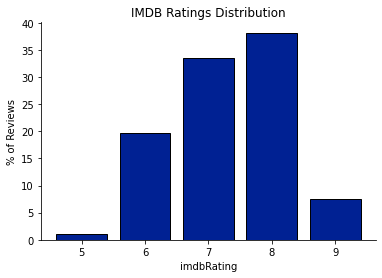

In [8]:
# looking at the distribution of the IMDB Ratings
values, counts = np.unique(ST_df['RATING'], return_counts=True)
normalized_reviews = counts/counts.sum()

plt.figure()
plt.bar(values, normalized_reviews * 100, edgecolor='black', color='#002193')
plt.xlabel('imdbRating')
plt.ylabel('% of Reviews')
sns.despine()
plt.title("IMDB Ratings Distribution")
plt.savefig("IMDB Ratings Distribution")
plt.show()

We can see that the distribution is normal, with a slight skew to the left. More than 30% of the total reviews are above a rating of 7 or higher. Our next step is to OneHotEncode the `EPISODE` column as it is not contributing to our model properly. 


In [11]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(ST_df[['EPISODE']])
    res = pd.concat([ST_df, dummies], axis=1)
    res = res.drop(['EPISODE'], axis=1)
    return(res) 

ST_df = encode_and_bind(ST_df, 'EPISODE')

In [12]:
ST_df.head()

,PICARD_PCT,RIKER_PCT,DATA_PCT,WORF_PCT,TROI_PCT,BEVERLY_PCT,GEORDI_PCT,Q_PCT,LORE_PCT,TOTAL_WORDS,...,EPISODE_unification part 1,EPISODE_unification part 2,EPISODE_up the long ladder,EPISODE_violations,EPISODE_we'll always have paris,EPISODE_when the bough breaks,EPISODE_where no one has gone before,EPISODE_where silence has lease,EPISODE_who watches the watchers,EPISODE_yesterday's enterprise
0,38.84,36.79,11.73,2.05,0.00,5.16,5.43,0.0,0.0,2634.0,...,0,0,0,0,0,0,0,0,0,0
1,12.89,3.38,16.98,28.58,16.79,4.76,16.64,0.0,0.0,2103.0,...,0,0,0,0,0,0,0,0,0,0
2,31.03,49.78,9.18,10.01,0.00,0.00,0.00,0.0,0.0,2037.0,...,0,0,0,0,0,0,0,0,0,0
3,40.31,26.84,10.69,1.68,3.44,1.03,16.00,0.0,0.0,2731.0,...,0,0,0,0,0,0,0,0,0,0
4,37.49,10.42,20.31,6.02,2.68,6.30,16.79,0.0,0.0,2841.0,...,0,0,0,0,0,0,0,0,0,0


Now we'll convert the `RATING` column to binary, where values above the rating of 7 will receive a 1, and the rest, 0. 

In [13]:
# where reviews that are below 9 should be encoded as 0 ('not good') and reviews with scores 9 and 10 as 1 ('good').
ST_df['RATING'] = np.where(ST_df['RATING'] > 7, 1, 0)

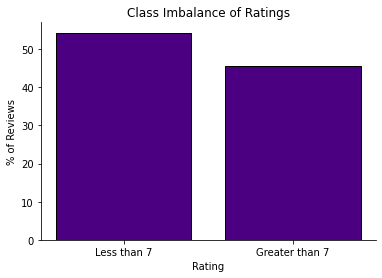

Class imbalance: [0.54 0.46]


In [62]:
# count the unique values and the number of times they appear
values, counts = np.unique(ST_df['RATING'], return_counts=True)

# normalize the counts to bring them into the same range (o and 1)
normalized_counts = counts/counts.sum()

# instantiate the plot
plt.figure()

# create a bar plot and convert the normalized_counts to percentage 
plt.bar(["Less than 7", "Greater than 7"], normalized_counts*100, edgecolor='black', color='indigo') 

# relevant labels
plt.xlabel('Rating')
plt.ylabel('% of Reviews')
plt.title('Class Imbalance of Ratings')
sns.despine()
plt.show()

# print the distribution of class imbalance
print(f"Class imbalance: {np.round(normalized_counts, 2)}")

The class imbalance is fair, since the distribution of the ratings was normal - we can trust that an imbalance of 54/46 is close enough to model on. 

Moving on, we can be confident going ahead with splitting the data set into train and test sets for our vectorization of the `RATING` column into numerical datatypes.

Before even attempting to vectorize the `RATING` column, we need to split the set into training and testing sets. After the splitting is completed, the training set(s) will be fit and transformed. Sidenote: the testing data shouldn't be mixed with the fit and transformation of the data. The fitting and transformation process will be applied separately to the `RATING` column.

Essentially:

1. Split `ST_df` into train and test sets
2. Apply `CountVectorizer()` on the training set for the `RATING` column
3. With the fitted `RATING`, transform the `RATING` column for both X_train and X_test
4. Save as a DataFrame
5. Combine the transformed `RATING` dataframe with the rest of the numeric columns of the training and test dataset

We'll begin by defining our X and y values:

X : all columns except for `RATING` (independent)
y : contains only `RATING` (dependent)

In [14]:
# separate df into features and target variable
y = ST_df['RATING']
# drop the target variable from the X dataframe (remaining features)
X = ST_df.drop('RATING',axis=1)

In [15]:
X.shape, y.shape

((173, 184), (173,))

Now that we've separated the independent and dependent variables from each other, now we'll performing a train test split using a test size of 20% and we won't be using the `y` as the number of classes is already normally distributed. 

In [16]:
# split the data into train and test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=7)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(121, 184) (121,)
(52, 184) (52,)


Let's the double check the distribution of the classes between the original, training data and the testing data to make sure that the stratify parameter is performing as intended. 

In [17]:
# class proportion in the original
print("Original Data Proportions")
print(y.value_counts()/len(y), '\n')

# class proportion in the training data
print("Training Data Proportions")
print(y_train.value_counts()/len(y_train), '\n')

# class proportion of the testing data
print("Testing Data Proportions")
print(y_test.value_counts()/len(y_test), '\n')

Original Data Proportions
0    0.543353
1    0.456647
Name: RATING, dtype: float64 

Training Data Proportions
0    0.545455
1    0.454545
Name: RATING, dtype: float64 

Testing Data Proportions
0    0.538462
1    0.461538
Name: RATING, dtype: float64 



### Tokenizing the Data

Before even attempting to model our data that we have, we must tokenize the text data. Our text data is in each document is a list of strings combined together (it's grouped by episode, so all of the lines from each episode are condensed in there, separated by a comma). To ensure optimal results, we'll perform some last additional cleaning steps. 

The `CountVectorizer()` will take the document, and then splits it into separate parts while removing whitespaces, punctuation, and the removal of stopwords as well. In addition to this, the `CountVectorizer()` has a parameter that allows the removel of tokens that appear a few times across the corpus (`min_df`). 

Firstly, we'll use the `CountVectorizer()`  to transform the text data and then combine with it the main dataframe. 

In [18]:
# importing/downloading all the relevant packages
import nltk
nltk.download("stopwords") # our filler words such as: the, and, for
nltk.download("punkt") # for punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Katya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Katya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# importing more packages
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

#### Finalizing the Cleaning

Now we'll create a tokenizer that removes the stopwords, and the punctuation from our text data. In the previous notebook, we already did the majority of the cleaning needed for it, including setting to lowercase, some punctuation and stopword removal. However, it seems that not all the stopwords were taken care of. To explain this, during our feature engineering in Part 1... this included grouping the text data on the episode level, rather than a few hundred rows dedicated to a single episode. This means that each line is separated by a comma, and some stopwords are left behind.  

*Here's an a small example of what it was before, where the text was line by line:*   

|who| episode | text |
|:----:|:------:|:-----:|
| DATA | the measure of a man | i am a sentient being |
| MADDOX | the measure of a man | no you are a robot | 
| RIKER | the measure of a man | data give me your arm |


*Our current dataframe, with all the scripts collated in one document, separated by a comma:*

| PICARD_PCT | DATA_PCT | EPISODE | SCRIPT |
|:----:|:---:|:------------:|:------:|
| 53.5 | 29.1 | the measure of a man | i am a sentient being, no you are a robot, data give me your arm |
| 35.23 | 9.64 | i borg | i am locutus of borg, the captain seemed not to respond to the nanobots | 

Let's clean some text. 

In [20]:
# remove the commas
ST_df['SCRIPT'] = ST_df['SCRIPT'].str.replace(r"[^-9A-Za-z ]", "")

In [21]:
#sanity check
ST_df.sample(10)

,PICARD_PCT,RIKER_PCT,DATA_PCT,WORF_PCT,TROI_PCT,BEVERLY_PCT,GEORDI_PCT,Q_PCT,LORE_PCT,TOTAL_WORDS,...,EPISODE_unification part 1,EPISODE_unification part 2,EPISODE_up the long ladder,EPISODE_violations,EPISODE_we'll always have paris,EPISODE_when the bough breaks,EPISODE_where no one has gone before,EPISODE_where silence has lease,EPISODE_who watches the watchers,EPISODE_yesterday's enterprise
19,41.10,5.37,23.87,4.45,5.84,10.96,8.39,0.0,0.0,4243.0,...,0,0,0,0,0,0,0,0,0,0
39,13.87,18.57,0.62,16.66,6.05,41.73,2.50,0.0,0.0,3403.0,...,0,0,0,0,0,0,0,0,0,0
32,61.03,1.98,26.33,1.18,1.86,0.71,6.91,0.0,0.0,3228.0,...,0,0,0,0,0,0,0,0,0,0
74,27.34,19.92,4.31,13.72,6.64,14.01,14.06,0.0,0.0,2063.0,...,0,0,0,0,0,0,0,0,0,0
0,38.84,36.79,11.73,2.05,0.00,5.16,5.43,0.0,0.0,2634.0,...,0,0,0,0,0,0,0,0,0,0
2,31.03,49.78,9.18,10.01,0.00,0.00,0.00,0.0,0.0,2037.0,...,0,0,0,0,0,0,0,0,0,0
4,37.49,10.42,20.31,6.02,2.68,6.30,16.79,0.0,0.0,2841.0,...,0,0,0,0,0,0,0,0,0,0
13,24.93,13.42,13.88,3.54,0.44,1.90,41.89,0.0,0.0,3421.0,...,0,0,0,0,0,0,0,0,0,0
25,18.55,4.93,16.15,14.23,27.28,0.00,18.86,0.0,0.0,2291.0,...,0,0,0,0,0,0,0,0,0,0
118,40.57,18.82,10.62,2.12,17.13,0.00,10.74,0.0,0.0,2364.0,...,0,0,0,0,0,0,0,0,0,0


With the dataset successfully cleaned, we'll move ahead with the vectorization of the `SCRIPT` column. 

In [22]:
# bag of words with the stop words argument included
bagofwords = CountVectorizer(stop_words="english")

# fit the training date for positive review
bagofwords.fit(X_train['SCRIPT'])

# transform the positive review column for both training and testing data
X_train_transformed = bagofwords.transform(X_train['SCRIPT']) 
X_test_transformed = bagofwords.transform(X_test['SCRIPT']) 

In [23]:
X_train_transformed

<121x17739 sparse matrix of type '<class 'numpy.int64'>'
	with 113872 stored elements in Compressed Sparse Row format>

In [24]:
X_test_transformed

<52x17739 sparse matrix of type '<class 'numpy.int64'>'
	with 45588 stored elements in Compressed Sparse Row format>

The data has been transformed, now we'll create a single dataframe that contains all the text's bag of words as individual words as the features. 

In [25]:
# create the dataframe containing the bag of words as the columnn for each word in X_train
script_count = pd.DataFrame(X_train_transformed.todense(), columns=bagofwords.get_feature_names())

In [26]:
script_count.head()

,99,aaaaard,aaah,aah,aaron,aban,abandon,abandoned,abandoning,abberation,...,zip,zipping,zone,zones,zoo,zoology,zorn,zweller,zylo,zytchin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that we have the dataframe ready to be combined with our main dataframe, we'll use the `concat()` method. After, we'll reset the index (and assign it back to `X_train` and `X_test`).

In [27]:
# reset the index of the X_train
X_train = X_train.reset_index(drop=True)

In [28]:
#sanity check
X_train.head()

,PICARD_PCT,RIKER_PCT,DATA_PCT,WORF_PCT,TROI_PCT,BEVERLY_PCT,GEORDI_PCT,Q_PCT,LORE_PCT,TOTAL_WORDS,...,EPISODE_unification part 1,EPISODE_unification part 2,EPISODE_up the long ladder,EPISODE_violations,EPISODE_we'll always have paris,EPISODE_when the bough breaks,EPISODE_where no one has gone before,EPISODE_where silence has lease,EPISODE_who watches the watchers,EPISODE_yesterday's enterprise
0,57.57,7.46,0.00,15.08,8.01,10.28,1.60,0.0,0.0,1810.0,...,0,0,0,0,0,0,0,0,0,0
1,30.80,19.68,14.33,4.97,5.44,17.57,7.21,0.0,0.0,2373.0,...,0,0,0,0,0,0,0,0,0,0
2,18.26,1.51,44.49,1.51,2.17,0.00,32.07,0.0,0.0,3187.0,...,0,0,0,0,0,0,0,0,0,0
3,59.14,21.29,2.72,0.29,10.25,6.31,0.00,0.0,0.0,1395.0,...,0,0,0,0,0,0,0,0,0,0
4,30.38,26.44,3.82,3.88,0.97,34.52,0.00,0.0,0.0,3404.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# joining the vectorized data with the original X_train
X_train = pd.concat([X_train, script_count], axis=1)

In [30]:
# drop the script column
X_train = X_train.drop('SCRIPT', axis=1)

In [31]:
X_train.head()

,PICARD_PCT,RIKER_PCT,DATA_PCT,WORF_PCT,TROI_PCT,BEVERLY_PCT,GEORDI_PCT,Q_PCT,LORE_PCT,TOTAL_WORDS,...,zip,zipping,zone,zones,zoo,zoology,zorn,zweller,zylo,zytchin
0,57.57,7.46,0.00,15.08,8.01,10.28,1.60,0.0,0.0,1810.0,...,0,0,0,0,0,0,0,0,0,0
1,30.80,19.68,14.33,4.97,5.44,17.57,7.21,0.0,0.0,2373.0,...,0,0,0,0,0,0,0,0,0,0
2,18.26,1.51,44.49,1.51,2.17,0.00,32.07,0.0,0.0,3187.0,...,0,0,0,0,0,0,0,0,0,0
3,59.14,21.29,2.72,0.29,10.25,6.31,0.00,0.0,0.0,1395.0,...,0,0,0,0,0,0,0,0,0,0
4,30.38,26.44,3.82,3.88,0.97,34.52,0.00,0.0,0.0,3404.0,...,0,0,0,0,0,0,0,0,0,0


We've successfully add our tokenized data to the `X_train` data, and we'll repeat the same steps for the `X_test` data. 

In [32]:
# create the dataframe containing the bag of words as the columnn for each word in X_test
script_count2 = pd.DataFrame(X_test_transformed.todense(), columns=bagofwords.get_feature_names())

In [33]:
# reset the index of the X_test
X_test = X_test.reset_index(drop=True)

In [34]:
# joining the vectorized data with the original X_test
X_test = pd.concat([X_test, script_count2], axis=1)

In [35]:
# drop the script column
X_test = X_test.drop('SCRIPT', axis=1)

In [36]:
X_test.head()

,PICARD_PCT,RIKER_PCT,DATA_PCT,WORF_PCT,TROI_PCT,BEVERLY_PCT,GEORDI_PCT,Q_PCT,LORE_PCT,TOTAL_WORDS,...,zip,zipping,zone,zones,zoo,zoology,zorn,zweller,zylo,zytchin
0,53.91,18.10,16.40,3.01,0.00,3.20,5.39,0.0,0.0,2061.0,...,0,0,0,0,0,0,0,0,0,0
1,20.10,25.39,12.88,12.63,14.40,0.00,14.60,0.0,0.0,2438.0,...,0,0,0,0,0,0,0,0,0,0
2,53.27,3.92,15.57,3.47,3.02,10.66,10.10,0.0,0.0,3546.0,...,0,0,0,0,0,0,0,0,0,0
3,18.98,34.53,34.64,6.01,0.54,0.00,5.31,0.0,0.0,1865.0,...,0,0,1,0,0,0,0,0,0,0
4,40.31,26.84,10.69,1.68,3.44,1.03,16.00,0.0,0.0,2731.0,...,0,0,0,0,0,0,0,0,0,0


Let's look at a quick little visualization of the top 20 most words in the series. 

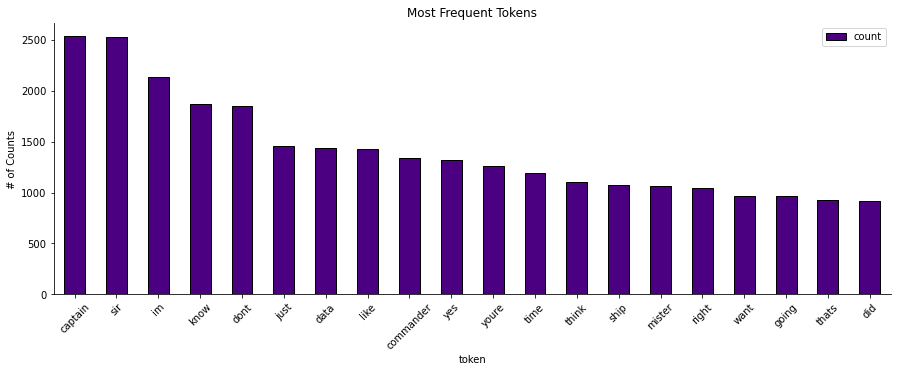

The X_train data shape is: (121, 17739)


In [37]:
# counts the number of features in the script column
words = bagofwords.get_feature_names()

# counts how many words in the array 
word_counts = X_train_transformed.toarray().sum(axis=0)

# create a function to plot the most frequent tokens that takes in tokens, the word count and the top 20 words/tokens
def plot_most_frequent(words, word_counts, top=20):
    words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
    fig, ax = plt.subplots(figsize=(0.75*top, 5))
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax, edgecolor='black', color='indigo')
    sns.despine()
    plt.ylabel("# of Counts")
    plt.title("Most Frequent Tokens")
    plt.savefig("Most Frequent Words")
    plt.show()
    
plot_most_frequent(words, word_counts)
print(f"The X_train data shape is: {X_train_transformed.shape}")

## Modelling Workflow 

Now that we've successfully split the data set into their respective train and test datasets, we can commence comfortably with modelling. 

Our workflow will be:
- Linear Regression
- Logistic Regression
- KNN
- SVM
- Naive Bayes

Let's start with the baseline models, determine which ones perform the best and then start tuning the hyperparameters through pipelines. 

### Linear Regression

In [73]:
#Instantiate the model
my_linear = LinearRegression()
#Fit model
my_linear = my_linear.fit(X_train, y_train)

# Scoring on original train and test sets
print(f'Train Score: {my_linear.score(X_train, y_train)}')
print(f'Test Score: {my_linear.score(X_test, y_test)}')

Train Score: 1.0
Test Score: -0.1946700557048815


### Logistic Regression

In [74]:
#Instantiate the model
my_log = LogisticRegression()
#Fit model
my_log = my_log.fit(X_train, y_train)

# Scoring on original train and test sets
print(f'Train Score: {my_log.score(X_train, y_train)}')
print(f'Test Score: {my_log.score(X_test, y_test)}')

Train Score: 1.0
Test Score: 0.6730769230769231


### SVM

In [80]:
# instantiate the model
SVM_model = LinearSVC()
# fit the model
SVM_model.fit(X_train, y_train)
# Scoring on original train and test sets
print(f'Train Score: {SVM_model.score(X_train, y_train)}')
print(f'Test Score: {SVM_model.score(X_test, y_test)}')

Train Score: 0.7851239669421488
Test Score: 0.5769230769230769


### Naive Bayer

In [81]:
# Instatiate our model
nbmodel = MultinomialNB()
# Fit our model
nbmodel.fit(X_train,y_train)
# Scoring on original train and test sets
print(f'Train Score: {nbmodel.score(X_train, y_train)}')
print(f'Test Score: {nbmodel.score(X_test, y_test)}')

Train Score: 1.0
Test Score: 0.8076923076923077


In [83]:
summary = pd.DataFrame(data = [acc_0_summary,acc_1_summary,acc_2_summary ], index = ['acc_0', 'acc_1', 'acc_2'])
summary.columns = ['mord_IT', 'mord_AT', 'Linear', 'Logistic', 'SVM', 'Naive Bayer']
summary

,mord_IT,mord_AT,Linear,Logistic,SVM,Naive Bayer
acc_0,0.730769,0.730769,0.442308,0.692308,0.711538,0.807692
acc_1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
acc_2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### K-Nearest Neighbours

In [86]:
# Instantiate
my_knn = KNeighborsClassifier()
# Fit
my_knn.fit(X_train,y_train)
# Predict & evaluate
train_accuracy = my_knn.score(X_train,y_train)
test_accuracy = my_knn.score(X_test,y_test)

print('remainder:',train_accuracy)
print('test:',test_accuracy)

remainder: 0.768595041322314
test: 0.5384615384615384


### Decision Tree Classifier

In [87]:
# instatiate the model
DT_model = DecisionTreeClassifier()
#fit
DT_model.fit(X_train, y_train)
# Predict & evaluate
train_accuracy = DT_model.score(X_train,y_train)
test_accuracy = DT_model.score(X_test,y_test)

print('remainder:',train_accuracy)
print('test:',test_accuracy)

remainder: 1.0
test: 0.5384615384615384


### Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier

my_random_forest = RandomForestClassifier()
my_random_forest.fit(X_train, y_train)
# Predict & evaluate
train_accuracy = my_random_forest.score(X_train,y_train)
test_accuracy = my_random_forest.score(X_test,y_test)

print('remainder:',train_accuracy)
print('test:',test_accuracy)

remainder: 1.0
test: 0.6346153846153846


In [92]:
pip install statsmodels

  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)
Note: you may need to restart the kernel to use updated packages.


Text(0, 0.5, 'Accuracy')

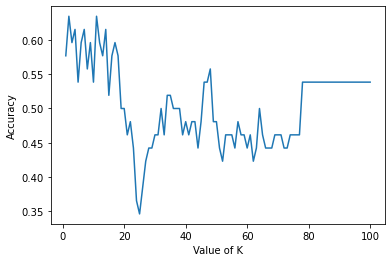

In [102]:

#Cross Validating model performance for range of 'K' neighbours

from sklearn import metrics
k_range=range(1,101)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    z=metrics.accuracy_score(y_test,pred)
    k_scores.append(z)

plt.plot(k_range,k_scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

In [ ]:
#Set the base estimator
estimators = [('model', LogisticAT())] 
#instantiate the pipeline
pipe = Pipeline(estimators)
#Set up param grid, for LogisticAT, there is only one hyper parameter for us to tune: alpha
param_grid = [
            {'model': [LogisticAT()],
             'model__alpha': [10**i for i in range(-3,3)]} #set the list of alpha to run a grid search
]

grid = GridSearchCV(pipe, param_grid, 
                    cv=3) #Using 3 folds cross validation

#fit the grid search
fittedgrid = grid.fit(X_train, y_train)

In [ ]:
fittedgrid.best_estimator_